In [31]:
import numpy as np

# patches of size n*n
n=7

def mean_cov(patch):
    mean = np.mean(patch)
    var = np.var(patch)
    return np.array([mean,var])

# getting consecuitve pathces of n*n from im
def get_patches(im):
    px = im.load()
    patches = []
    for i in range(0,  im.size[0] - n):
        for j in range(0, im.size[1] - n):
            patch = []
            for k in range(i, i + n):
                for l in range(j, j + n):
                    patch.append(px[k, l])
            patches.append(mean_cov(patch))
    return patches


import random
import numpy as np  # Import the numpy library for np.mean and np.var

class K_means:
    class cluster:
        def __init__(self, mean=None):
            self.mean = mean
            self.NoOfPoints = 0

        def center(self):
            return self.mean

    def dissimilarity(self, point1, point2):
        return np.linalg.norm(np.array(point1) - np.array(point2))
    
    def assign_cluster(self, point):
        min_dissimilarity = self.dissimilarity(point, self.clusters[0].center())
        cluster_index = 0
        for i in range(1, self.k):
            dissimilarity = self.dissimilarity(point, self.clusters[i].center())
            if dissimilarity < min_dissimilarity:
                min_dissimilarity = dissimilarity
                cluster_index = i
        return cluster_index

    def __init__(self, k):
        self.k = k
        self.clusters = [None for i in range(k)]

    def fit(self, data):
        # Initializing cluster centers
        centers = set()
        while len(centers) < self.k:
            centers.add(random.randint(0, len(data) - 1))
        centers = list(centers)

        self.clusters = [self.cluster(data[centers[i]]) for i in range(self.k)]
        
        

        iterations = 0
        while True:
            iterations += 1
            
            new_clusters = [self.cluster() for i in range(self.k)]
            
            for point in data:
                cluster_index = self.assign_cluster(point)
                if(new_clusters[cluster_index].mean is None):
                    new_clusters[cluster_index].mean = point
                else:
                    new_clusters[cluster_index].mean += point
                new_clusters[cluster_index].NoOfPoints += 1
                    
            for i in range(self.k):
                new_clusters[i].mean /= new_clusters[i].NoOfPoints
                
            print("Iteration:", iterations,"means:", [self.clusters[i].mean for i in range(self.k)])

            # Check for convergence by comparing cluster centers
            converged = True
            for i in range(self.k):
                if not np.array_equal(new_clusters[i].mean, self.clusters[i].mean):
                    converged = False
                    break

            if converged:
                break
            else:
                self.clusters = new_clusters
                

        print("Number of iterations:", iterations)
        return [self.clusters[i].mean for i in range(self.k)]



In [32]:
# reading all the images
import os
from PIL import Image
path = "./2c/Train/"
images = []
maxImages=1
for filename in os.listdir(path):
    im = Image.open(path + filename)
    images.append(im)
    maxImages-=1
    if(maxImages<0):
        break
print("Number of images:", len(images))


Number of images: 2


In [33]:
# getting path data of each image
data = []
for i in range(len(images)):
    patches = get_patches(images[i])
    data += patches
print("Number of patches:", len(data))


Number of patches: 510050


In [34]:
kmeans=K_means(3)
print(kmeans.fit(data))

Iteration: 1 means: [array([228.89795918,   3.6426489 ]), array([228.7755102 ,   5.43940025]), array([227.87755102,   4.02582257])]
Iteration: 2 means: [array([228.87583964,   3.54352944]), array([194.73833307, 625.16273326]), array([203.06067546,   8.29442316])]
Iteration: 3 means: [array([228.70322594,   3.59017372]), array([183.95582988, 775.31992691]), array([220.5347518 ,  20.75064507])]
Iteration: 4 means: [array([228.70322594,   3.59017372]), array([180.04830883, 858.93670508]), array([179.31594148, 663.72335066])]
Iteration: 5 means: [array([220.53520494,  20.74307006]), array([168.91406213, 984.83063014]), array([179.31594148, 663.72335066])]
Iteration: 6 means: [array([220.534613 ,  20.7579732]), array([220.53418593,  20.75968131]), array([220.53384275,  20.75852097])]
Number of iterations: 6
[array([220.534613 ,  20.7579732]), array([220.53418593,  20.75968131]), array([220.53384275,  20.75852097])]


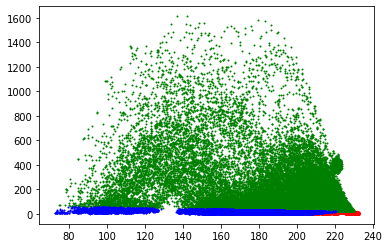

In [38]:
# Plot the clusters
import matplotlib.pyplot as plt
colors = ['r', 'g', 'b', 'y', 'c', 'm']
cluster_points = [kmeans.assign_cluster(point) for point in data]
for i in range(kmeans.k):
    cluster = np.array([data[j] for j in range(len(data)) if cluster_points[j] == i])
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i % len(colors)], s=1)
    

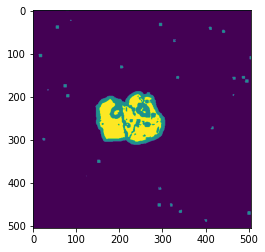

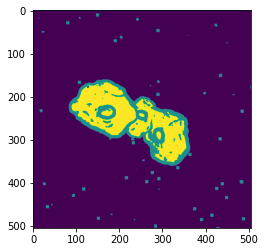

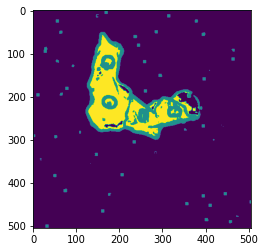

In [42]:
# now testing on test images
path = "./2c/Test/"
images = []
for filename in os.listdir(path):
    im = Image.open(path + filename)
    images.append(im)
    
for image in images:
    patches = get_patches(image)
    labels = [kmeans.assign_cluster(patch) for patch in patches]
    labels = np.array(labels)
    plt.imshow(labels.reshape(image.size[0] - n, image.size[1] - n))
    plt.show()